# Chain ladder method

We're going to implement the most used methodology for estimating the projected losses using data from run-off triangles. 

The procedure consists on finding some factors by development year from which we could estimate the expected loss on a certein year by their next development. This is described as follows:
\begin{array}{rl}
C_{i,j+1} = f_j \times C_{i,j}.
\end{array}

Where $C_{i,j}$ represents every cell of triangles. Then, the development factor tells you how the cumulative amount in development year $j$ grows to the cumulative amount in year $j+1$. We need to find the $\hat{f}_j^{CL}$ estimated for each development year:

\begin{array}{rl}
\hat{C}_{ij}^{CL} &= C_{i,I-i} \cdot \prod_{l=I-i}^{j-1} \hat{f}_l^{CL} \\
\hat{f}_j^{CL} &= \frac{\sum_{i=1}^{I-j-1} C_{i,j+1}}{\sum_{i=1}^{I-j-1} C_{ij}},
\end{array}

Where $C_{i,I−i}$ is on the last observed diagonal. It is clear that an important assumption of the chain-ladder method is that the proportional developments of claims from one development period to the next are similar for all occurrence years.

## Objective
To ensure that sufficient funds are retained to cover the claims liabilities of a company, liabilities equal to an estimate of all claims to be reported in the future are held. Since the final, or ultimate, amount of claims arising from each accident year $i, C_{i,J}$, is not known, Incurred but Not Reoprted (IBNR) techniques are applied to produce an estimate of these claims $\hat{C}^k_{i,J}$ in each calendar year $k$. 

Then, IBNR reserves for accident year $i$, $R^k_{i,j^*}$ are calculated in a cummulative display as $\hat{C}^k_{i,J} − C_{i,j^∗}$, where $j^∗ = k - i$, ie, in practical terms, is equal to the difference between the last row minus the largest diagonal of the triangle (latest observed claims). This expression can be rearranged in terms of the forecast incremental claims such that $R^k_{i,j} = \sum^J_{l=j^*+1} \hat{X}_{i,l}$. Anyway, the estimation of IBNR reserves depends on the estimate of ultimate losses (Balona and Richman, 2020).

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chainladder as cl
import os

In [19]:
input = pd.read_csv(os.path.normpath(os.getcwd() + os.sep + os.pardir)+"/data/ppauto_pos.csv")

In [20]:
input = input[input.DevelopmentYear <= 1997]

In [21]:
cleaning_cond = np.array(['Adriatic Ins Co', 'Aegis Grp', 'Agency Ins Co Of MD Inc',
       'Allegheny Cas Co', 'American Modern Ins Grp Inc',
       'Armed Forces Ins Exchange', 'Auto Club South Ins Co',
       'Baltica-Skandinavia Rein Co Of Amer', 'Bancinsure Inc',
       'Bell United Ins Co', 'Century-Natl Ins Co', 'Co-Operative Ins Co',
       'Consumers Ins Usa Inc', 'Cornerstone Natl Ins Co',
       'Federated Natl Ins Co', 'First Amer Ins Co',
       'Florists Mut Ins Grp', 'Harbor Ins Co', 'Homestead Ins Co',
       'Inland Mut Ins Co', 'Interstate Auto Ins Co Inc', 'Lancer Ins Co',
       'Lumber Ins Cos', 'Manhattan Re Ins Co', 'Mennonite Mut Ins Co',
       'Middle States Ins Co Inc', 'National Automotive Ins',
       'Nevada General Ins Co', 'New Jersey Citizens United Rcp Exch',
       'Nichido Fire & Marine Ins Co Ltd', 'Northwest Gf Mut Ins Co',
       'Ocean Harbor Cas Ins Co', 'Overseas Partners Us Reins Co',
       'Pacific Ind Ins Co', 'Pacific Pioneer Ins Co',
       'Pacific Specialty Ins Co', 'Penn Miller Grp',
       'Pennsylvania Mfg Asn Ins Co', 'Pioneer State Mut Ins Co',
       'Protective Ins Grp', 'San Antonio Reins Co',
       'Seminole Cas Ins Co', 'Southern Group Ind Inc',
       'Southern Mut Ins Co', 'Southland Lloyds Ins Co', 'Star Ins Grp',
       'Sterling Ins Co', 'Usauto Ins Co', 'Vanliner Ins Co',
       'Wea Prop & Cas Ins Co', 'Wellington Ins Co', 'State Farm Mut Grp', 'United Services Automobile Asn Grp',
       'US Lloyds Ins Co', 'Toa-Re Ins Co Of Amer', 'FL Farm Bureau Grp'])

In [22]:
input = input[~input.GRNAME.isin(cleaning_cond)]

After importing and cleaning data as on Initial Data Analysis was intended, we are estimating the full run-off triangles for our sample through the Chain ladder (cl) library for python, as it allows us to manage large amount of triangles and derive some relevant conclusions from this methodology.

In [23]:
auto_triangles = cl.Triangle(input, 
                             index = 'GRCODE',
                             origin="AccidentYear",
                             development="DevelopmentYear",
                             columns=["IncurLoss_B"],
                             cumulative=True)

In [24]:
auto_triangles

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(90, 1, 10, 10)"
Index:,[GRCODE]
Columns:,[IncurLoss_B]


In [25]:
auto_model = cl.Chainladder().fit(auto_triangles)

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/chainladder/utils/weighted_regression.py:58: RuntimeWarning: Mean of empty slice
  xp.nansum(w * x * y, axis) - xp.nansum(x * w, axis) * xp.nanmean(y, axis)
/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/chainladder/utils/weighted_regression.py:62: RuntimeWarning: Mean of empty slice
  intercept = xp.nanmean(y, axis) - slope * xp.nanmean(x, axis)


In [26]:
auto_model.full_triangle_.iloc[43]

,12,24,36,48,60,72,84,96,108,120,132,9999
1988,"6,433","6,452","6,908","6,437","6,612","6,703","6,719","6,718","6,705","6,704","6,704","6,704"
1989,"8,697","8,438","8,515","8,392","8,428","8,532","8,643","8,459","8,483","8,482","8,482","8,482"
1990,"12,738","11,754","11,308","11,260","11,384","11,294","11,317","11,296","11,304","11,303","11,303","11,303"
1991,"13,658","12,448","12,312","12,507","12,281","12,177","12,027","11,934","11,943","11,941","11,941","11,941"
1992,"12,228","10,932","11,206","10,688","10,649","10,624","10,624","10,542","10,550","10,548","10,548","10,548"
1993,"13,138","13,305","14,017","13,953","13,759","13,752","13,752","13,646","13,656","13,654","13,654","13,654"
1994,"15,577","17,912","17,790","17,594","17,560","17,551","17,551","17,415","17,428","17,425","17,425","17,425"
1995,"15,785","18,672","18,297","18,024","17,989","17,980","17,980","17,841","17,854","17,851","17,851","17,851"
1996,"23,907","23,613","23,717","23,363","23,317","23,306","23,306","23,126","23,143","23,139","23,139","23,139"
1997,"23,369","23,630","23,734","23,380","23,334","23,323","23,323","23,143","23,159","23,156","23,156","23,156"


## Results

Taking an example from the sample, this company could expect that the ultimate losses for the last year of development will be at USD $23,156.

In [ ]:
auto_model.full_triangle_.mean(0).mean(1)

,12,24,36,48,60,72,84,96,108,120,132,9999
1988,"8,928","8,959","9,018","8,990","8,943","8,760","8,705","8,675","8,700","8,724","8,724","8,724"
1989,"9,830","10,168","10,236","10,224","10,164","10,091","10,022","9,989","9,971","9,990","9,990","9,990"
1990,"11,541","11,819","11,857","11,634","11,599","11,439","11,357","11,337","11,333","11,355","11,355","11,355"
1991,"12,760","12,693","12,572","12,431","12,226","12,109","12,052","12,011","12,012","12,029","12,029","12,029"
1992,"14,026","13,450","13,219","13,086","13,005","12,866","12,788","12,749","12,737","12,769","12,769","12,769"
1993,"15,488","15,259","15,148","14,853","14,725","14,562","14,466","14,419","14,412","14,441","14,441","14,441"
1994,"16,644","16,164","16,031","15,821","15,690","15,528","15,434","15,388","15,372","15,409","15,409","15,409"
1995,"17,590","17,227","17,147","16,948","16,801","16,597","16,473","16,412","16,404","16,435","16,435","16,435"
1996,"18,433","18,186","18,106","17,906","17,739","17,523","17,396","17,333","17,335","17,380","17,380","17,380"
1997,"19,374","19,385","19,364","19,107","18,943","18,669","18,494","18,408","18,414","18,441","18,441","18,441"


In this sense, the average expected loss for the last development year is USD $18,441.

In [64]:
auto_model.ultimate_.mean(0)

,2261
1988,"8,724"
1989,"9,990"
1990,"11,355"
1991,"12,029"
1992,"12,769"
1993,"14,441"
1994,"15,409"
1995,"16,435"
1996,"17,380"
1997,"18,441"


However, the IBNR that the companies must have for possible claims are expected for last year at levels on $83,008. On the other hand, the balance until 1990 is positive on IBNR, that means that this group of insurers are overestimating the amount of total auto claims that must to, as is showed below.

In [48]:
auto_model.ibnr_.mean(0)

,2261
1988,
1989,"1,702"
1990,"1,583"
1991,"-2,135"
1992,"-8,750"
1993,"-25,534"
1994,"-37,079"
1995,"-64,021"
1996,"-72,489"
1997,"-83,008"


/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/chainladder/core/pandas.py:364: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


<AxesSubplot:>

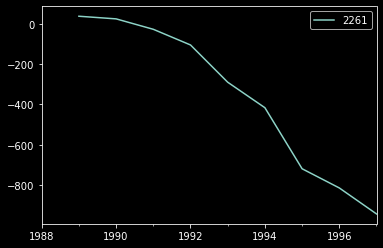

In [51]:
auto_model.ibnr_.mean(0).plot()

# Results evaluation

In order to verify the validity of above conclusions, we proceed to compute the Actual versus Expected (AvE) on full triangle. This measure could bring us dome relevant information about the errors that could arose from chainladder estimation procedure. This is the difference between the full triangle projected with the development factor estimations and the observed values on the upper run-off losses triangle.

In [74]:
auto_AvE = auto_triangles - auto_model.full_expectation_
auto_AvE = auto_AvE[auto_AvE.valuation <= auto_triangles.valuation_date]
auto_actual_mean = auto_model.full_triangle_.mean(0).mean(1)[auto_model.full_triangle_.valuation <= auto_triangles.valuation_date]
auto_AvE_percentage = 100*(auto_AvE.mean(0).mean(1)/auto_actual_mean)

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/chainladder/core/pandas.py:364: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


In [ ]:
auto_AvE.mean(0).mean(1).heatmap()

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/chainladder/core/pandas.py:364: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)
/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,12,24,36,48,60,72,84,96,108,120
1988,-425.43,-232.89,-104.21,-41.88,-14.05,-11.01,-16.70,-29.94,-0.00,
1989,-718.18,-238.77,-108.38,-13.94,6.30,39.10,31.47,29.94,-0.00,
1990,-565.87,-144.76,-40.01,-10.49,45.14,0.56,-15.16,,,
1991,-26.03,148.89,74.68,70.75,-44.79,-29.00,,,,
1992,611.48,152.62,-17.62,-16.43,7.31,-0.00,,,,
1993,325.77,197.00,146.62,11.90,,,,,,
1994,423.99,99.03,48.83,0.00,,,,,,
1995,277.81,18.78,0.00,,,,,,,
1996,104.03,0.00,,,,,,,,
1997,-0.00,,,,,,,,,


In [87]:
auto_AvE_percentage.heatmap()

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,12,24,36,48,60,72,84,96,108,120
1988,-4.7649,-2.5995,-1.1556,-0.4659,-0.1571,-0.1257,-0.1919,-0.3452,-0.0000,
1989,-7.3057,-2.3481,-1.0589,-0.1363,0.0620,0.3875,0.3140,0.2998,-0.0000,
1990,-4.9032,-1.2248,-0.3374,-0.0902,0.3891,0.0049,-0.1335,,,
1991,-0.2040,1.1730,0.5940,0.5692,-0.3663,-0.2395,,,,
1992,4.3596,1.1348,-0.1333,-0.1255,0.0562,-0.0000,,,,
1993,2.1033,1.2911,0.9679,0.0801,,,,,,
1994,2.5474,0.6126,0.3046,0.0000,,,,,,
1995,1.5794,0.1090,0.0000,,,,,,,
1996,0.5644,0.0000,,,,,,,,
1997,-0.0000,,,,,,,,,


From this, one could establish that the prediction errors would be grater for earlier years, this makes sense as the chain ladder procedure is intended to estimate the latest values of losses instead earliest. However, the differences are little in percentage points (larger up to 7.3% and on average 0.1%)

In [ ]:
class ChainLadder_manual:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = ""):
        
        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK

    def Triangulos(self):
        
        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        diccionario_todos_triangulos = {} 

        for k in datos["GRCODE"].unique():

            Filtro_datos = datos[datos["GRCODE"] == k]
        
            Triangulo_full = Filtro_datos.pivot_table(values = "IncurLoss_C", index = "AccidentYear", columns='DevelopmentLag', aggfunc="sum", margins=False)
            Triangulo_full_acumulado = Triangulo_full.copy()
            
            num_filas = Triangulo_full_acumulado.shape[0]
            num_columnas = Triangulo_full_acumulado.shape[1]

            for indice, i in enumerate(range(1,num_columnas+1)):
                Triangulo_full_acumulado[Triangulo_full.columns[indice]] = Triangulo_full[Triangulo_full.columns[0:i]].sum(axis = 1)

            Triangulo_acumulado_mitad = Triangulo_full_acumulado.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_acumulado_mitad.iloc[i, -j] = None  # Puedes establecerlo en None u otro valor si lo prefieres

            factores0 = Triangulo_acumulado_mitad.sum(axis = 0) # Rojo
            factores1 = Triangulo_acumulado_mitad.sum(axis = 0)-np.flip(np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)) # Azul
            factores0 = factores0[1:10]
            factores1 = factores1[0:-1]
            factores = factores0.reset_index(drop = True) / factores1.reset_index(drop = True)

            Triangulo_estimado = Triangulo_acumulado_mitad.copy()
            for i in list(reversed(range(num_filas))):
                comodin = np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)[i]
                for j in range(1,i+1):
                    Triangulo_estimado.iloc[i, -j] = comodin*factores.iloc[-i+9:-j+10].prod()   # Puedes establecerlo en None u otro valor si lo prefieres

            reserva_total = sum(np.array(list(reversed(np.array(Triangulo_estimado[10]))))-np.flip(np.diag(np.fliplr(Triangulo_estimado), 0)))

            diciconario_triangulo = {'Triangulo_full':Triangulo_full, "Triangulo_full_acumulado":Triangulo_full_acumulado, 
                                     "Triangulo_acumulado_mitad":Triangulo_acumulado_mitad, "factores":factores, "Triangulo_estimado":Triangulo_estimado,
                                     "reserva_total":reserva_total}
            
            nombre = "Triangulo " + str(k)
            diccionario_todos_triangulos[nombre] = diciconario_triangulo

        return diccionario_todos_triangulos


In [ ]:
resultados = ChainLadder_manual(tabla = input, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_B", index = "GRCODE")
triangulos_resultados = resultados.Triangulos()
triangulos_resultados["Triangulo 43"]["Triangulo_estimado"]

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,607.0,1254.000000,1836.000000,2434.000000,3048.000000,3663.000000,4278.000000,4892.000000,5506.000000,6120.000000
1989,2254.0,5113.000000,8092.000000,10856.000000,13682.000000,16699.000000,19689.000000,22667.000000,25645.000000,28504.794769
1990,5843.0,13267.000000,21574.000000,30245.000000,39311.000000,48237.000000,57004.000000,65769.000000,74341.235858,82631.377306
1991,11422.0,27515.000000,46163.000000,65258.000000,83911.000000,102380.000000,120787.000000,139220.327475,157366.102587,174914.738073
1992,19933.0,44095.000000,72834.000000,101163.000000,129234.000000,156956.000000,185210.631996,213475.662433,241299.769965,268208.244131
1993,24604.0,56734.000000,90309.000000,123078.000000,156800.000000,191021.108081,225408.013407,259807.574011,293670.515549,326419.098285
1994,40735.0,84679.000000,127190.000000,168902.000000,216043.669331,263194.522383,310573.815772,357970.545978,404627.906591,449749.870748
1995,43064.0,86769.000000,129678.000000,176876.115109,226243.412898,275620.327984,325236.468416,374870.868883,423730.993018,470983.232341
1996,41837.0,83141.000000,129536.356828,176682.918931,225996.294383,275319.276628,324881.222922,374461.409305,423268.165074,470468.792273


## References 
Balona, C., and Richman, R. (2020). The Actuary and IBNR Techniques: A Machine Learning Approach. Available at SSRN 3697256.